<a href="https://colab.research.google.com/github/DaxKaktus/BOOM2025/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


LOAD DATA

In [13]:
df = pd.read_csv('/content/drive/MyDrive/boom-himatika-its-2025-main/data/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
print("Info Dataset:")
df.info()
print("5 Data Teratas:")
df.head()

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
5 Data Teratas:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# Cek jumlah baris & kolom
print("Jumlah baris dan kolom:")
df.shape


Jumlah baris dan kolom:


(200, 5)

In [16]:
print("STATISTIK DESKRIPTIF")
df.describe()

STATISTIK DESKRIPTIF


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
# Cek missing values
print("Jumlah missing values per kolom:")
df.isnull().sum()    # Jika ada missing values bisa diisi atau dihapus
#df = df.dropna()  # untuk drop baris yang ada NaN

Jumlah missing values per kolom:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [18]:
# Cek duplicate
duplicate = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate}")
if duplicate > 0:
    df = df.drop_duplicate()
    print("Duplikat telah dihapus")
else:
    print("Tidak ada duplikat")

Jumlah data duplikat: 0
Tidak ada duplikat


In [20]:
# Normalisasi fitur (karena skala berbeda, Pilih fitur numerik)
features = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_numeric = df[features]

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Encoding manual Gender
gender_mapping = {'Male': 1, 'Female': 0}
gender_encoded = df['Gender'].map(gender_mapping)

# Gabungkan hasil
X_final = pd.DataFrame(X_numeric_scaled, columns=features)
X_final['Gender'] = gender_encoded.values

print("Hasil preprocessing:")
X_final.head()


Hasil preprocessing:


,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


Analisi Fitur

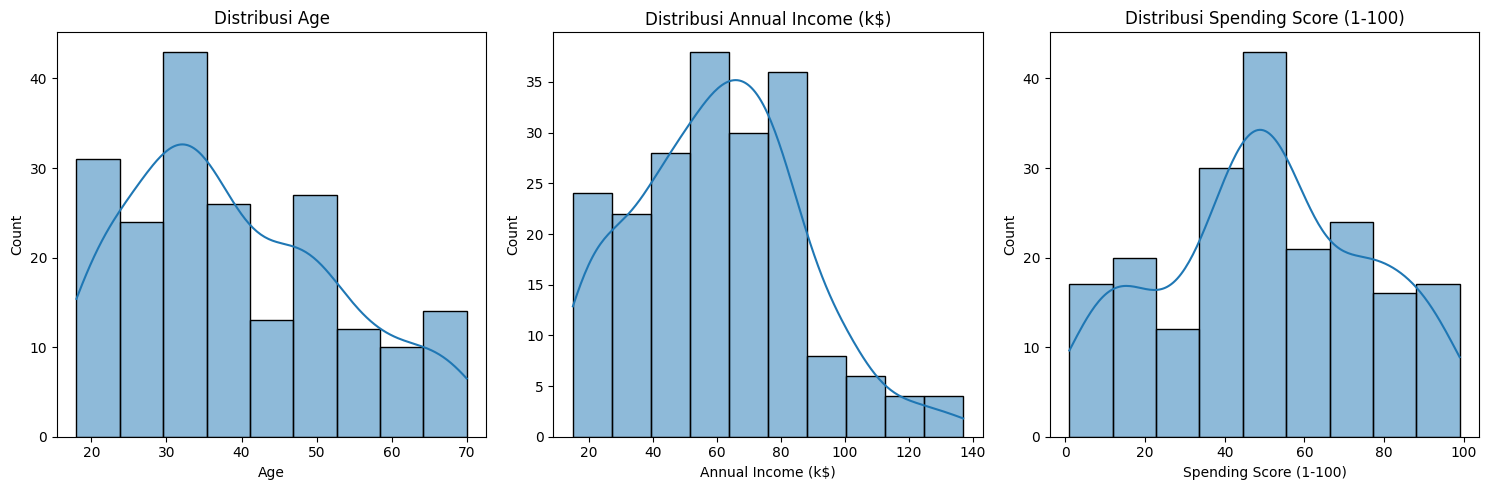

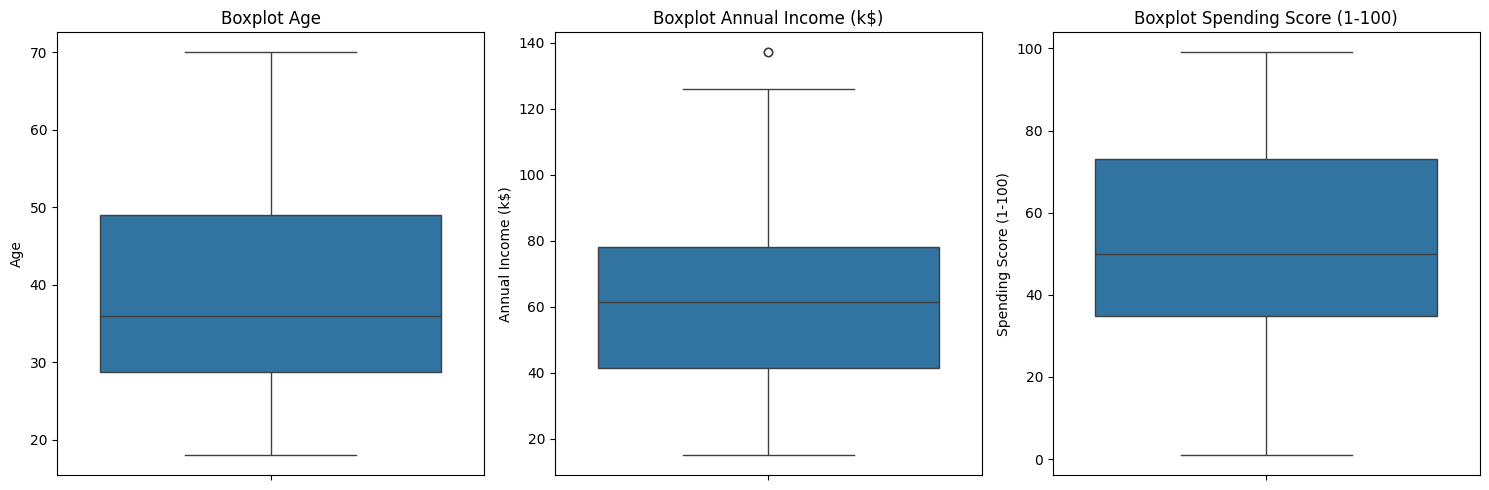

In [24]:
# Visualisasi distribusi fitur numerik
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Boxplot untuk melihat outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
plt.tight_layout()
plt.show()

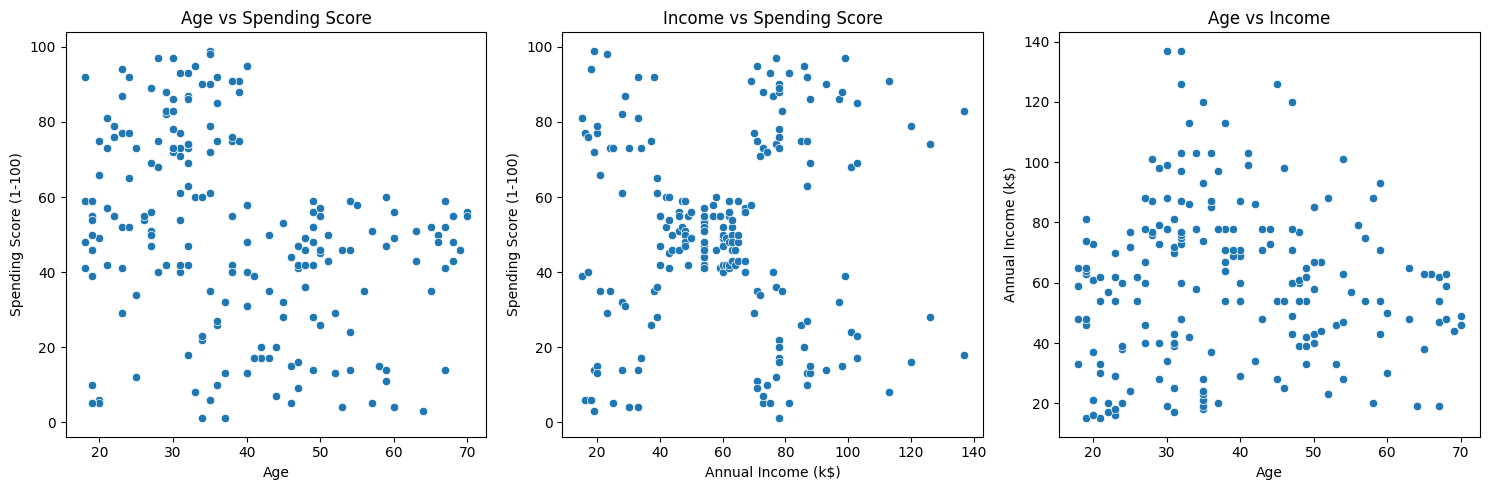

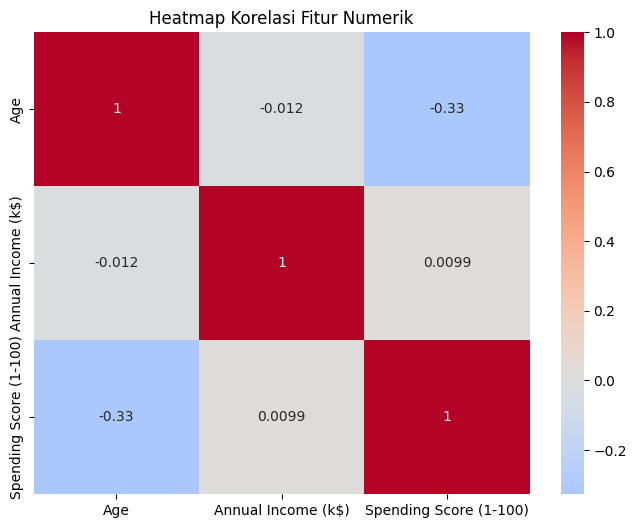

In [23]:
# Analisis hubungan antar fitur dengan scatter plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('Age vs Spending Score')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Income vs Spending Score')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.title('Age vs Income')

plt.tight_layout()
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Pemilihan Fitur

In [31]:
# Skenario 1: 3 fitur utama
features_3 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_3 = df[features_3]

# Normalisasi data (sangat penting untuk clustering)
scaler = StandardScaler()

X_3_scaled = scaler.fit_transform(X_3)

print("Shape data setelah scaling:")
print(f"Skenario 3 fitur: {X_3_scaled.shape}")
print(f"Skenario semua fitur: {X_final.shape}")

Shape data setelah scaling:
Skenario 3 fitur: (200, 3)
Skenario semua fitur: (200, 4)


Pemodelan

In [27]:
# Fungsi untuk evaluasi model
def evaluate_clustering(X, labels, model_name):
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score - Baseline (Random Cluster): {silhouette_avg:.3f}")
    return silhouette_avg

# Baseline: Random clustering (sebagai pembanding)
np.random.seed(42)
random_labels = np.random.randint(0, 3, len(X_3_scaled))

print("HASIL BASELINE (RANDOM)")
evaluate_clustering(X_3_scaled, random_labels, "Random Clustering")


HASIL BASELINE (RANDOM)
Silhouette Score - Baseline (Random Cluster): -0.024


np.float64(-0.024309750673140243)

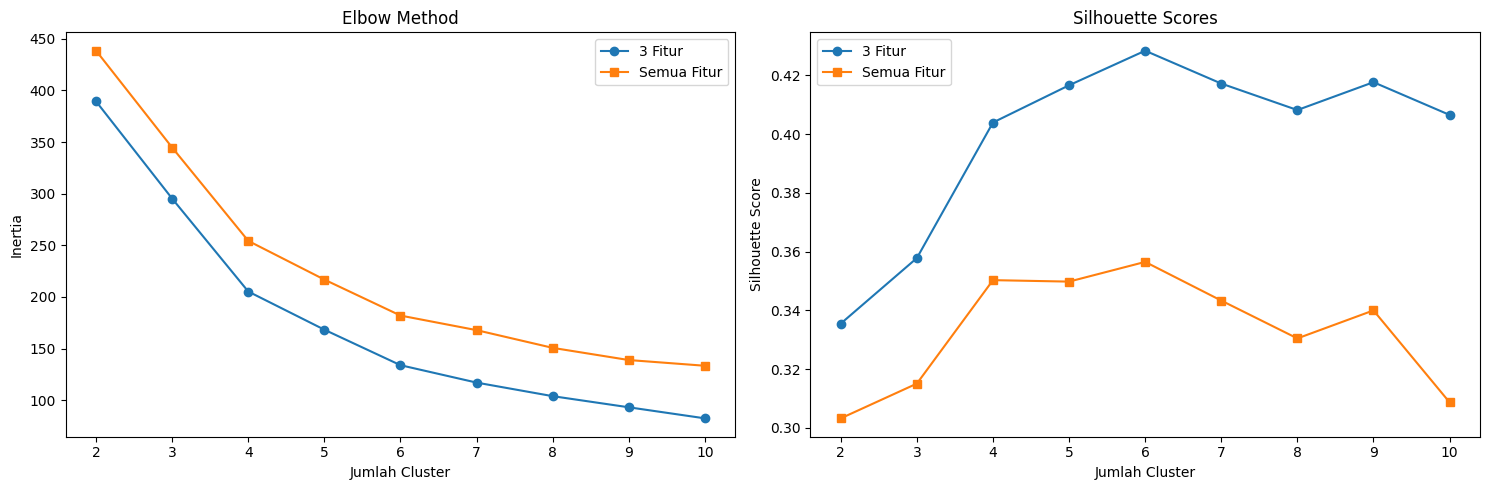

In [32]:
# K-Means Clustering
def kmeans_clustering(X, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia = kmeans.inertia_
    return labels, inertia

# Coba K-Means dengan berbagai jumlah cluster untuk mencari yang optimal
def find_optimal_clusters(X, max_k=10):
    inertias = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

    return inertias, silhouette_scores

# Plot elbow method dan silhouette scores
inertias_3, sil_scores_3 = find_optimal_clusters(X_3_scaled)
inertias_all, sil_scores_all = find_optimal_clusters(X_final)

plt.figure(figsize=(15, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias_3, marker='o', label='3 Fitur')
plt.plot(range(2, 11), inertias_all, marker='s', label='Semua Fitur')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores_3, marker='o', label='3 Fitur')
plt.plot(range(2, 11), sil_scores_all, marker='s', label='Semua Fitur')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.legend()

plt.tight_layout()
plt.show()

Kombinasi Fitur dan Model

In [39]:
# Dictionary untuk menyimpan hasil semua kombinasi
results = {}

# Kombinasi yang akan diuji
combinations = [
    ('3_fitur', 'kmeans_3', X_3_scaled, 3),
    ('3_fitur', 'kmeans_4', X_3_scaled, 4),
    ('3_fitur', 'kmeans_5', X_3_scaled, 5),
    ('semua_fitur', 'kmeans_3', X_final, 3),
    ('semua_fitur', 'kmeans_4', X_final, 4),
    ('semua_fitur', 'kmeans_5', X_final, 5),
    ('semua_fitur', 'kmeans_6', X_final, 6)  # Kombinasi ke-7
]

print(" HASIL SEMUA KOMBINASI")
for i, (feature_set, model_name, X_data, n_clusters) in enumerate(combinations, 1):
    labels, inertia = kmeans_clustering(X_data, n_clusters=n_clusters)
    silhouette = silhouette_score(X_data, labels)

    results[f"comb_{i}"] = {
        'feature_set': feature_set,
        'model': model_name,
        'n_clusters': n_clusters,
        'labels': labels,
        'inertia': inertia,
        'silhouette_score': silhouette
    }

    print(f"Kombinasi {i}: {feature_set} + {model_name}")
    print(f"  - Silhouette Score: {silhouette:.4f}")
    print(f"  - Inertia: {inertia:.2f}")
    print()

 HASIL SEMUA KOMBINASI
Kombinasi 1: 3_fitur + kmeans_3
  - Silhouette Score: 0.3578
  - Inertia: 295.21

Kombinasi 2: 3_fitur + kmeans_4
  - Silhouette Score: 0.4040
  - Inertia: 205.23

Kombinasi 3: 3_fitur + kmeans_5
  - Silhouette Score: 0.4166
  - Inertia: 168.25

Kombinasi 4: semua_fitur + kmeans_3
  - Silhouette Score: 0.3150
  - Inertia: 344.68

Kombinasi 5: semua_fitur + kmeans_4
  - Silhouette Score: 0.3503
  - Inertia: 254.28

Kombinasi 6: semua_fitur + kmeans_5
  - Silhouette Score: 0.3498
  - Inertia: 216.78

Kombinasi 7: semua_fitur + kmeans_6
  - Silhouette Score: 0.3565
  - Inertia: 181.95



KOMBINASI TERBAIK
Kombinasi: 3_fitur + kmeans_5
Silhouette Score: 0.4166
Jumlah Cluster: 5


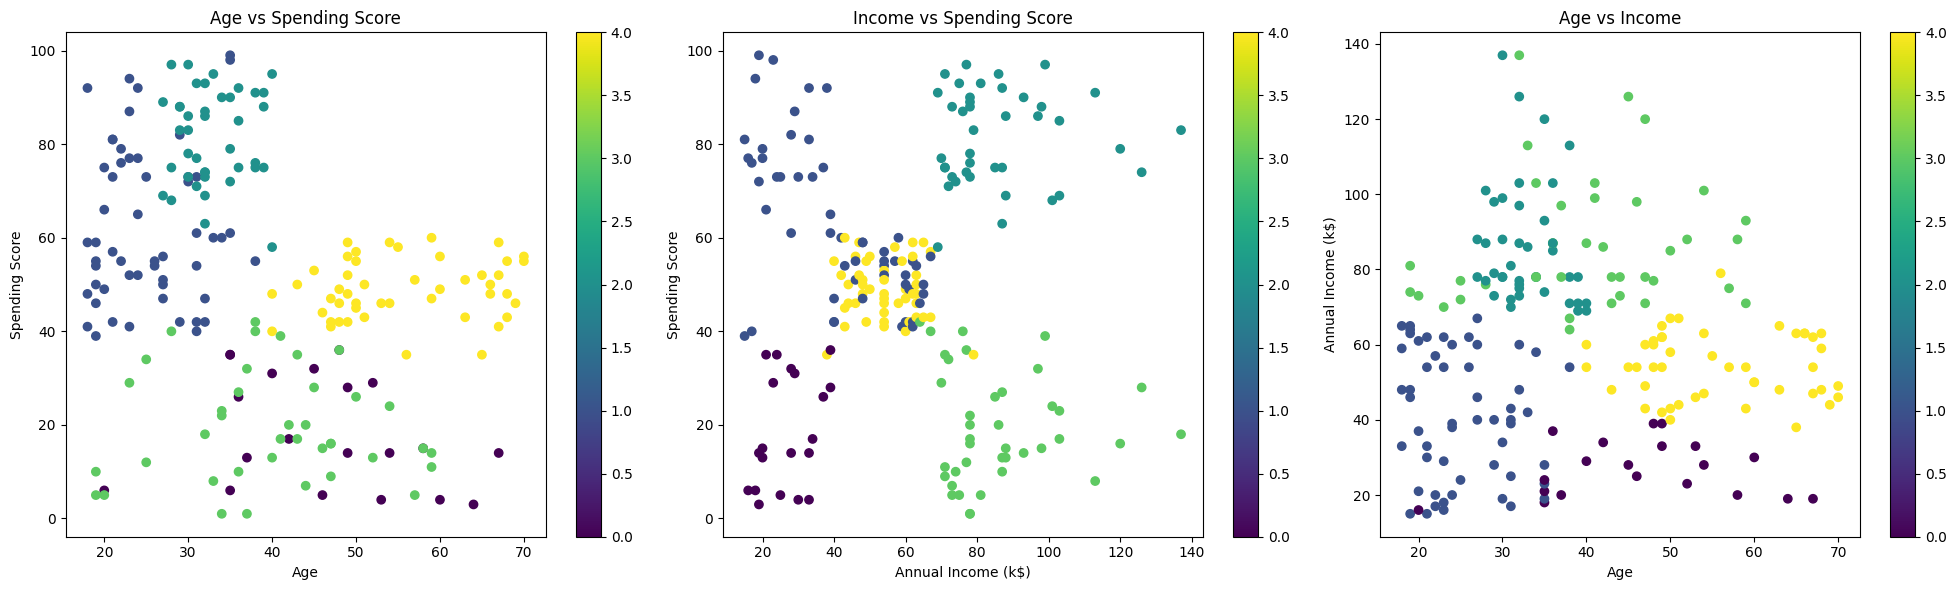

In [40]:
# Visualisasi hasil clustering terbaik
best_comb = max(results.items(), key=lambda x: x[1]['silhouette_score'])
best_key, best_result = best_comb

print(f"KOMBINASI TERBAIK")
print(f"Kombinasi: {best_result['feature_set']} + {best_result['model']}")
print(f"Silhouette Score: {best_result['silhouette_score']:.4f}")
print(f"Jumlah Cluster: {best_result['n_clusters']}")

# Tambahkan labels ke dataframe asli
df['Cluster'] = best_result['labels']

# Visualisasi clustering dengan scatter plot
if best_result['feature_set'] == '3_fitur':
    fig = plt.figure(figsize=(20, 6))

    # Age vs Spending Score
    ax1 = fig.add_subplot(131)
    scatter1 = ax1.scatter(df['Age'], df['Spending Score (1-100)'],
                          c=df['Cluster'], cmap='viridis')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Spending Score')
    ax1.set_title('Age vs Spending Score')
    plt.colorbar(scatter1, ax=ax1)

    # Annual Income vs Spending Score
    ax2 = fig.add_subplot(132)
    scatter2 = ax2.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                          c=df['Cluster'], cmap='viridis')
    ax2.set_xlabel('Annual Income (k$)')
    ax2.set_ylabel('Spending Score')
    ax2.set_title('Income vs Spending Score')
    plt.colorbar(scatter2, ax=ax2)

    # Age vs Annual Income
    ax3 = fig.add_subplot(133)
    scatter3 = ax3.scatter(df['Age'], df['Annual Income (k$)'],
                          c=df['Cluster'], cmap='viridis')
    ax3.set_xlabel('Age')
    ax3.set_ylabel('Annual Income (k$)')
    ax3.set_title('Age vs Income')
    plt.colorbar(scatter3, ax=ax3)

    plt.tight_layout()
    plt.show()

else:  # Untuk semua fitur, gunakan PCA untuk visualisasi 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_final)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Visualisasi Cluster dengan PCA (Semua Fitur)')
    plt.colorbar(scatter)
    plt.show()

KARAKTERISTIK TIAP CLUSTER
           Age        Annual Income (k$)        Spending Score (1-100)         \
          mean    std               mean    std                   mean    std   
Cluster                                                                         
0        46.25  11.58              26.75   7.31                  18.35  11.94   
1        25.19   5.51              41.09  16.82                  62.24  16.60   
2        32.88   3.86              86.10  16.34                  81.53  10.00   
3        39.87  10.94              86.10  16.73                  19.36  11.61   
4        55.64   8.91              54.38   8.82                  48.85   6.30   

        CustomerID  
             count  
Cluster             
0               20  
1               54  
2               40  
3               39  
4               47  


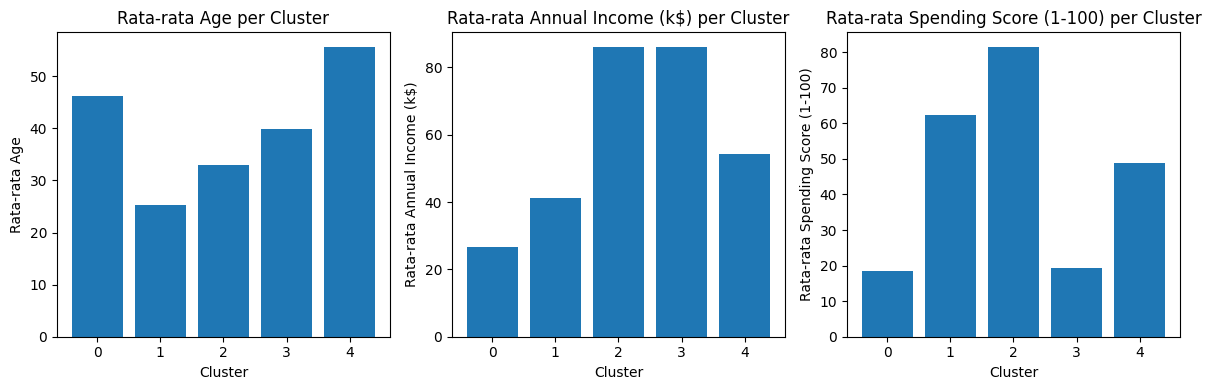

In [41]:
# Analisis karakteristik tiap cluster
print("KARAKTERISTIK TIAP CLUSTER")
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'  # Menghitung jumlah anggota cluster
}).round(2)

print(cluster_summary)

# Visualisasi karakteristik cluster
cluster_means = df.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.bar(cluster_means.index, cluster_means[feature])
    plt.xlabel('Cluster')
    plt.ylabel(f'Rata-rata {feature}')
    plt.title(f'Rata-rata {feature} per Cluster')
plt.tight_layout()
plt.show()

In [42]:
print("KESIMPULAN & INSIGHT")
print(f"Kombinasi terbaik: {best_result['feature_set']} dengan {best_result['model']}")
print(f"Jumlah cluster optimal: {best_result['n_clusters']}")
print(f"Kualitas clustering (Silhouette Score): {best_result['silhouette_score']:.4f}")

print("INTERPRETASI CLUSTER")
# Berdasarkan analisis karakteristik cluster, kita bisa berikan interpretasi
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]

    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = len(cluster_data)

    print(f"\nCluster {cluster_id} (Size: {size}):")
    print(f"  - Rata-rata Umur: {avg_age:.1f} tahun")
    print(f"  - Rata-rata Pendapatan: ${avg_income:.1f}k")
    print(f"  - Rata-rata Spending Score: {avg_spending:.1f}")

    # Berikan interpretasi berdasarkan karakteristik
    if avg_income > 70 and avg_spending > 70:
        print("  → High Income - High Spending Customers")
    elif avg_income < 40 and avg_spending < 40:
        print("  → Low Income - Low Spending Customers")
    elif avg_income < 50 and avg_spending > 60:
        print("  → Budget-Conscious but High Spenders")
    elif avg_income > 60 and avg_spending < 40:
        print("  → High Income but Conservative Spenders")
    else:
        print("  → Average Customers")

KESIMPULAN & INSIGHT
Kombinasi terbaik: 3_fitur dengan kmeans_5
Jumlah cluster optimal: 5
Kualitas clustering (Silhouette Score): 0.4166
INTERPRETASI CLUSTER

Cluster 0 (Size: 20):
  - Rata-rata Umur: 46.2 tahun
  - Rata-rata Pendapatan: $26.8k
  - Rata-rata Spending Score: 18.4
  → Low Income - Low Spending Customers

Cluster 1 (Size: 54):
  - Rata-rata Umur: 25.2 tahun
  - Rata-rata Pendapatan: $41.1k
  - Rata-rata Spending Score: 62.2
  → Budget-Conscious but High Spenders

Cluster 2 (Size: 40):
  - Rata-rata Umur: 32.9 tahun
  - Rata-rata Pendapatan: $86.1k
  - Rata-rata Spending Score: 81.5
  → High Income - High Spending Customers

Cluster 3 (Size: 39):
  - Rata-rata Umur: 39.9 tahun
  - Rata-rata Pendapatan: $86.1k
  - Rata-rata Spending Score: 19.4
  → High Income but Conservative Spenders

Cluster 4 (Size: 47):
  - Rata-rata Umur: 55.6 tahun
  - Rata-rata Pendapatan: $54.4k
  - Rata-rata Spending Score: 48.9
  → Average Customers


# ANALISIS SEGMENTASI PELANGGAN

##Cluster 0: Low Income - Low Spending Customers

Profil: 20 pelanggan (10% dari total)

* Usia: 46.2 tahun (middle-aged)

* Pendapatan: $26.8k (terendah)

* Spending Score: 18.4 (sangat rendah)

Karakteristik:

* Kelompok dengan daya beli terbatas

* Kemungkinan besar keluarga dengan tanggungan

* Prioritas kebutuhan dasar daripada keinginan

Rekomendasi Strategi:

* Produk: Item dengan harga terjangkau, diskon, paket hemat

* Promosi: Voucher cashback, program loyalitas sederhana

* Komunikasi: Fokus pada value for money dan durability

## Cluster 1: Budget-Conscious but High Spenders
Profil: 54 pelanggan (27% dari total) - SEGMENT TERBESAR

* Usia: 25.2 tahun (young adults)

* Pendapatan: $41.1k (menengah-bawah)

* Spending Score: 62.2 (tinggi)

Karakteristik:

* Generasi muda yang aktif berbelanja

* Mungkin single atau baru memulai karir

* Cenderung impulsive buying tapi dengan budget terbatas

Rekomendasi Strategi:

* Produk: Trendy items, fashion, entertainment, experience-based

* Promosi: Buy now pay later, student discount, flash sale

* Komunikasi: Social media marketing, influencer collaboration

## Cluster 2: High Income - High Spending Customers
Profil: 40 pelanggan (20% dari total)

* Usia: 32.9 tahun (young professionals)

* Pendapatan: $86.1k (tertinggi)

* Spending Score: 81.5 (sangat tinggi)

Karakteristik:

* Target market premium

* Professionals sukses atau dual income family

* Quality seeker dan early adopters

Rekomendasi Strategi:

* Produk: Premium/luxury items, personalized service

* Promosi: VIP membership, exclusive preview, personal shopper

* Komunikasi: Email marketing premium, private events

## Cluster 3: High Income but Conservative Spenders
Profil: 39 pelanggan (19.5% dari total)

* Usia: 39.9 tahun (established professionals)

* Pendapatan: $86.1k (tertinggi)

* Spending Score: 19.4 (sangat rendah)

Karakteristik:

* Financial planners atau savings-oriented

* Mungkin berinvestasi daripada konsumsi

* Pembelian sangat calculated dan needs-based

Rekomendasi Strategi:

* Produk: Investment products, high-quality durable goods

* Promosi: Bundle deals, warranty extension, value-added services

* Komunikasi: Content edukasi finansial, ROI-focused messaging

## Cluster 4: Average Customers
Profil: 47 pelanggan (23.5% dari total)

* Usia: 55.6 tahun (senior/mature)

* Pendapatan: $54.4k (menengah)

* Spending Score: 48.9 (rata-rata)

Karakteristik:

* Konsumen stabil dan predictable

* Mungkin empty nesters atau pre-retirement

* Brand loyal dan risk-averse

Rekomendasi Strategi:

* Produk: Comfort and convenience products, health & wellness

* Promosi: Loyalty programs, senior discounts, family packages

* Komunikasi: Traditional media, word-of-mouth referrals

